# MNIST data set.   
load from keras

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
import matplotlib.pyplot as plt


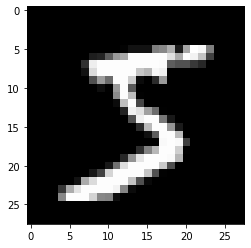

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
X_train[0].shape # 784,

(28, 28)

In [7]:
# RESHAPING THE DATA
X_train.shape # 60000, 784

(60000, 28, 28)

In [8]:
X_train = X_train.reshape((60000, 784))

In [9]:
X_test = X_test.reshape((X_test.shape[0], 784))

In [10]:
X_train.shape

(60000, 784)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from keras.utils import np_utils
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (60000, 10)


In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
import keras
model = keras.Sequential()

In [15]:
from keras.layers import Dense, Dropout
from keras import regularizers

model.add(Dense(256, input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
from keras.callbacks import EarlyStopping

model.fit(X_train, y_train, batch_size=128, epochs=15, callbacks=[EarlyStopping()])

Epoch 1/15
469/469 [==============================] - 8s 14ms/step - loss: 23.3010 - accuracy: 0.8368
Epoch 2/15
469/469 [==============================] - 6s 14ms/step - loss: 10.7411 - accuracy: 0.8724
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 5.3173 - accuracy: 0.8757
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 2.6593 - accuracy: 0.8721
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 1.5000 - accuracy: 0.8681
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 1.1592 - accuracy: 0.8641
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 1.0999 - accuracy: 0.8644
Epoch 8/15
469/469 [==============================] - 4s 8ms/step - loss: 1.1463 - accuracy: 0.8590
Epoch 9/15
469/469 [==============================] - 4s 8ms/step - loss: 1.1444 - accuracy: 0.8587
Epoch 10/15
469/469 [==============================] - 4s 8ms/step - loss: 1.1463 - accuracy: 0.

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2134 - accuracy: 0.8761


[1.2133703231811523, 0.8761000037193298]

In [20]:

model.predict(X_test[0:1])

array([[8.3697469e-20, 9.0697953e-35, 1.5765695e-27, 1.5774298e-12,
        1.7166573e-29, 8.8700328e-22, 5.4501123e-31, 1.0000000e+00,
        1.7198531e-25, 5.5161573e-19]], dtype=float32)

In [24]:
X_test.shape

(10000, 784)

In [25]:
X_test = X_test.reshape((X_test.shape[0], 28,28))

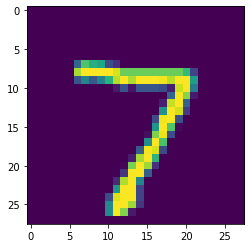

In [26]:
plt.imshow(X_test[0])